In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [152]:
hiv_original = pd.read_csv('data/df_main.csv', index_col=0).dropna()

hiv = hiv_original.copy().drop(767)

hiv.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [153]:
hiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2936 entries, 0 to 3139
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county_code        2936 non-null   int64  
 1   COUNTY             2936 non-null   object 
 2   STATEABBREVIATION  2936 non-null   object 
 3   YEAR               2936 non-null   int64  
 4   AMAT_fac           2936 non-null   float64
 5   HIVdiagnoses       2936 non-null   float64
 6   HIVincidence       2936 non-null   float64
 7   HIVprevalence      2936 non-null   float64
 8   MH_fac             2936 non-null   float64
 9   Med_AMAT_fac       2936 non-null   float64
 10  Med_MH_fac         2936 non-null   float64
 11  Med_SA_fac         2936 non-null   float64
 12  Med_SMAT_fac       2936 non-null   float64
 13  Med_TMAT_fac       2936 non-null   float64
 14  PLHIV              2936 non-null   float64
 15  Population         2936 non-null   float64
 16  SA_fac             2936 

In [154]:
hiv['mme_percap'].describe()

count    2936.000000
mean      708.032323
std       458.288789
min         0.000000
25%       404.500000
50%       650.000000
75%       931.000000
max      4086.900000
Name: mme_percap, dtype: float64

In [155]:
hiv.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income'],
      dtype='object')

In [156]:
X = hiv[['AMAT_fac', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'unemployment_rate','%msm12month', '%msm5yr', 'poverty_rate',
       'household_income']]

y = hiv[['HIVincidence']]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 1536 to 1928
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AMAT_fac           2202 non-null   float64
 1   MH_fac             2202 non-null   float64
 2   Med_AMAT_fac       2202 non-null   float64
 3   Med_MH_fac         2202 non-null   float64
 4   Med_SA_fac         2202 non-null   float64
 5   Med_SMAT_fac       2202 non-null   float64
 6   Med_TMAT_fac       2202 non-null   float64
 7   PLHIV              2202 non-null   float64
 8   Population         2202 non-null   float64
 9   SA_fac             2202 non-null   float64
 10  SMAT_fac           2202 non-null   float64
 11  TMAT_fac           2202 non-null   float64
 12  drugdeathrate      2202 non-null   float64
 13  drugdeathrate_est  2202 non-null   float64
 14  drugdeaths         2202 non-null   float64
 15  mme_percap         2202 non-null   float64
 16  partD30dayrxrate   22

In [133]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [134]:
yhat = model.predict(X_test)
# yhat
mse = mean_squared_error(y_test, yhat)
mse

54.56351394526096

In [135]:
rmse = np.sqrt(mse)
rmse

7.386711984723714

In [136]:
#plt.scatter(yhat, y_test - yhat)
y_test[(y_test - yhat > 700).values.flatten()]

,HIVincidence


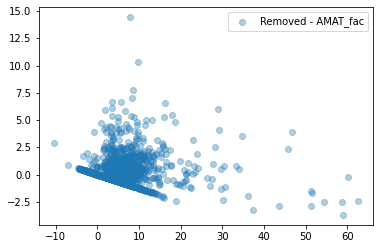

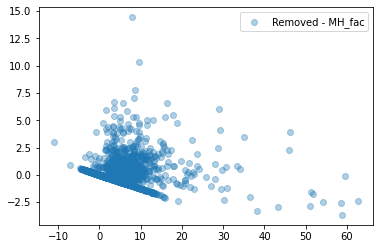

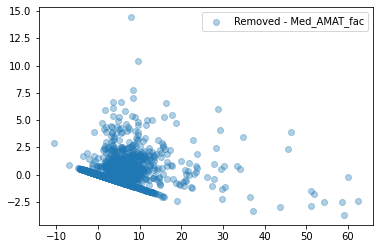

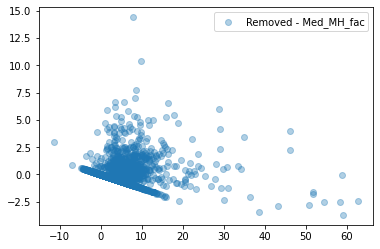

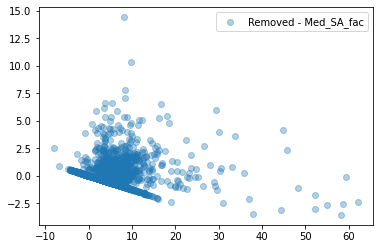

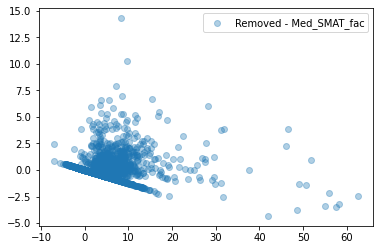

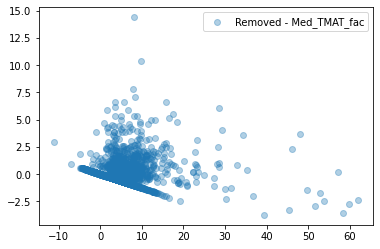

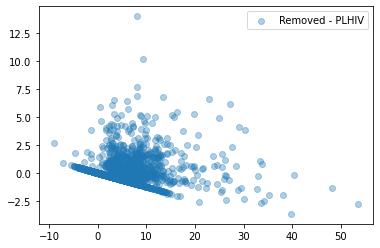

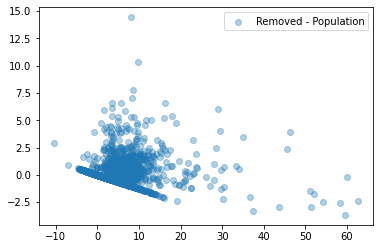

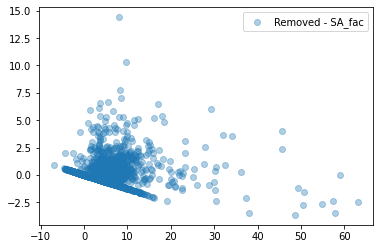

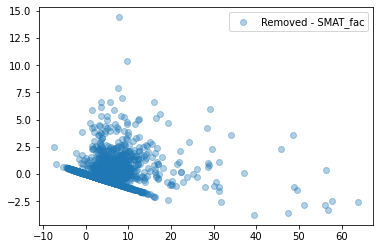

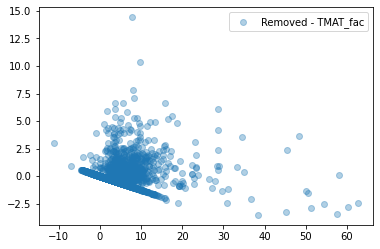

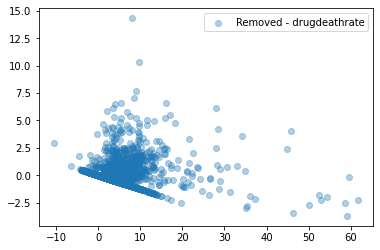

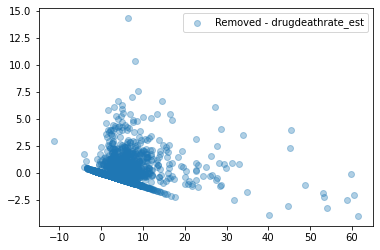

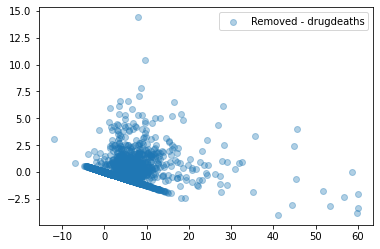

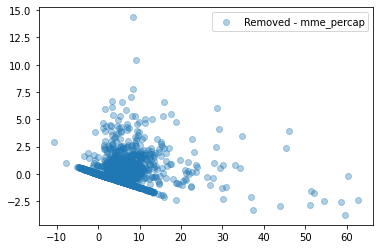

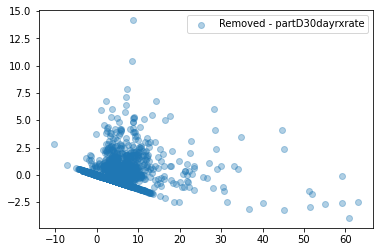

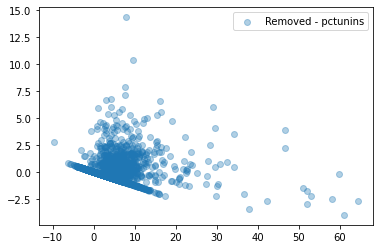

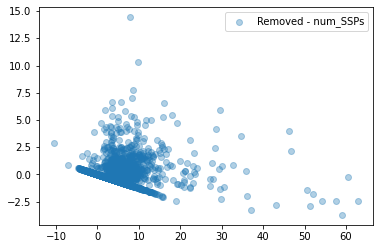

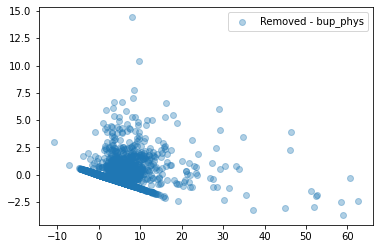

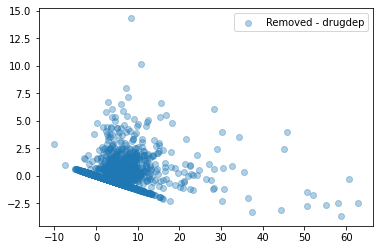

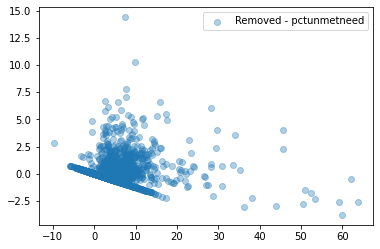

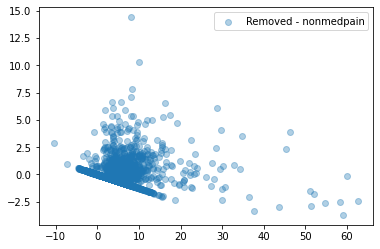

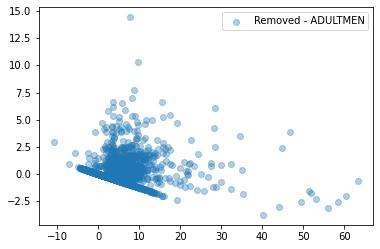

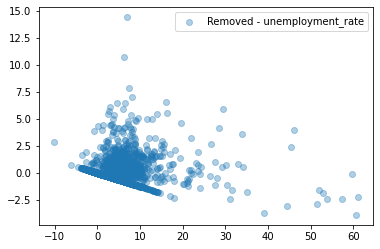

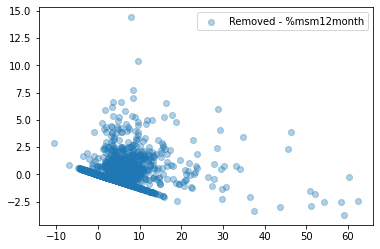

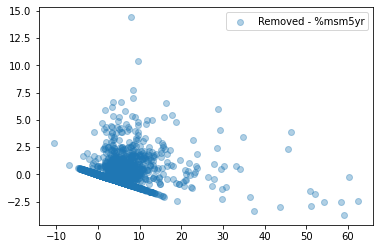

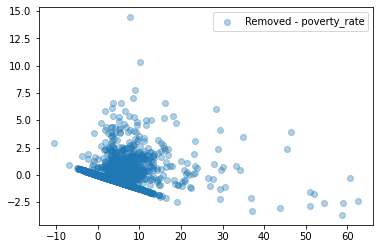

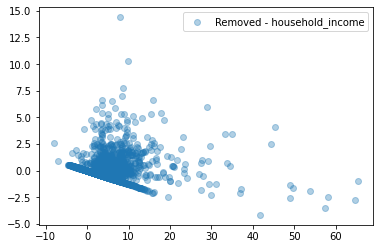

In [138]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

def plot_model(X, y, label='Residual Plot'):
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()



all_columns = X.columns
for col_name in all_columns:
    all_columns_copy = list(all_columns)
    all_columns_copy.remove(col_name)
    plot_model(X[all_columns_copy], y, 'Removed - ' + str(col_name))


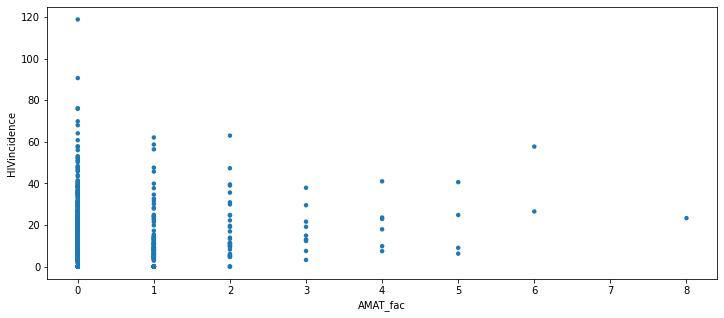

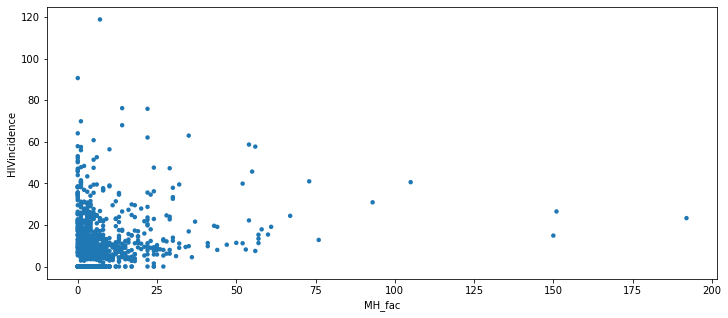

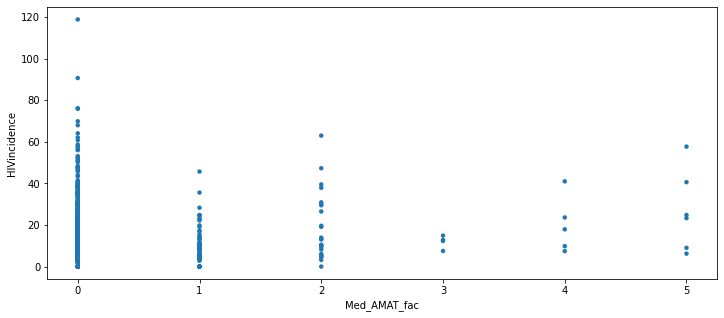

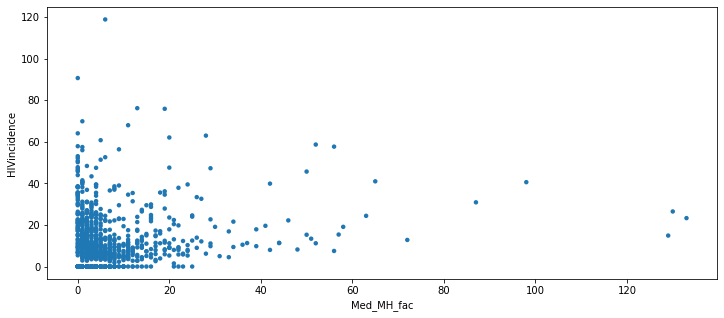

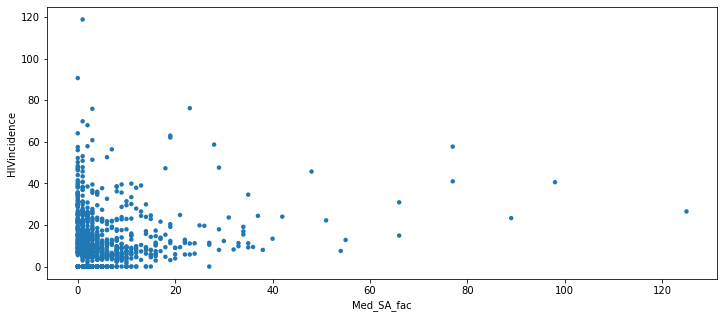

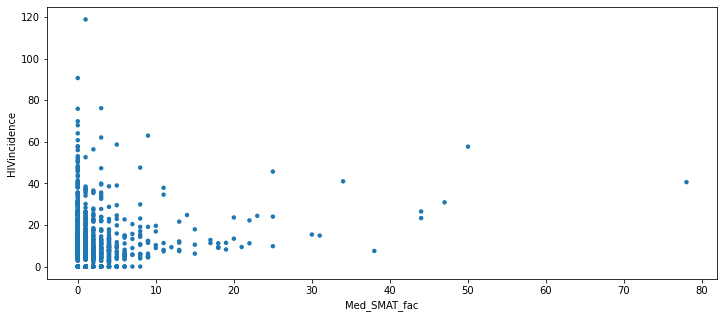

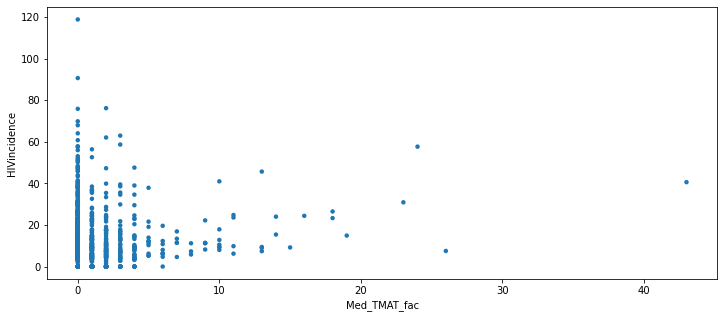

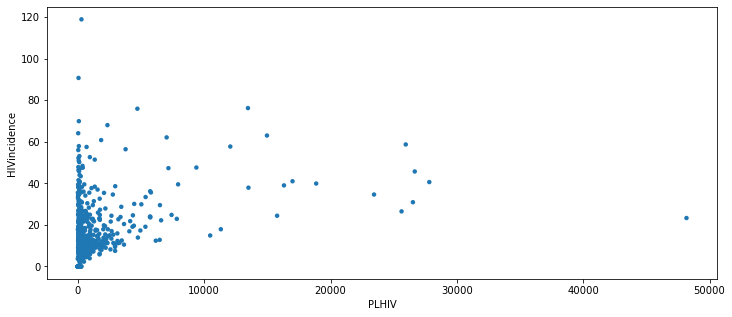

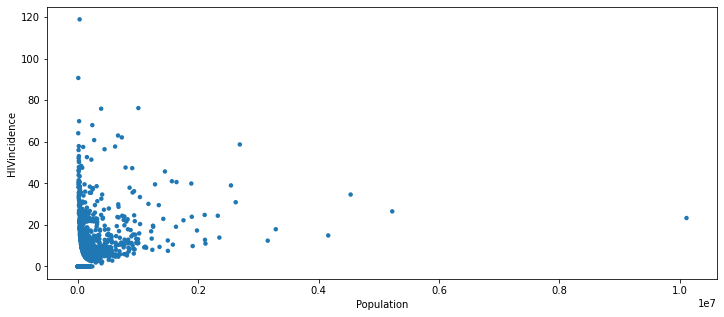

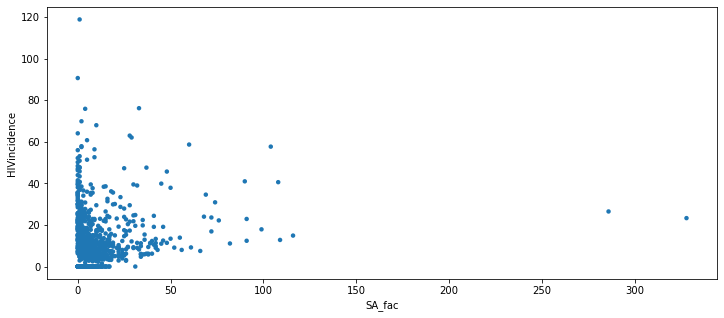

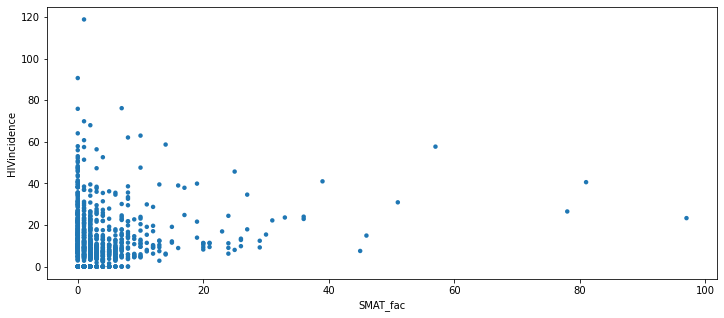

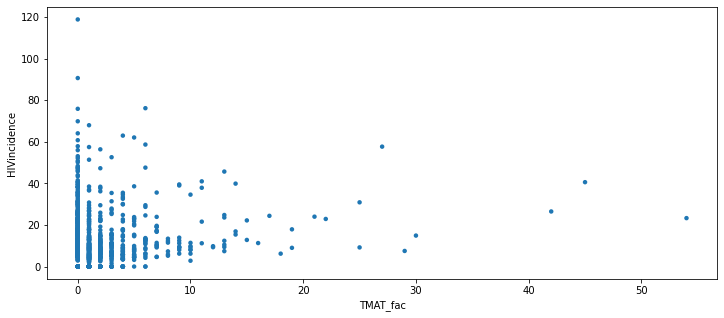

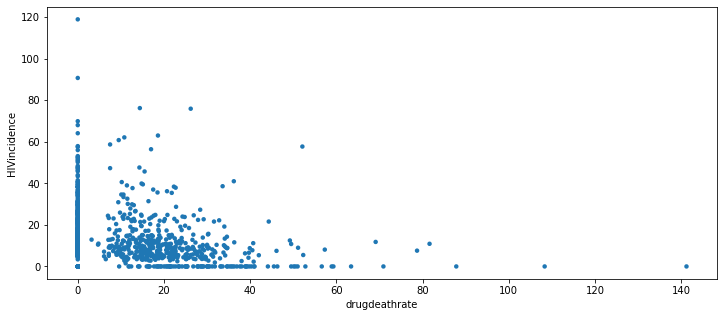

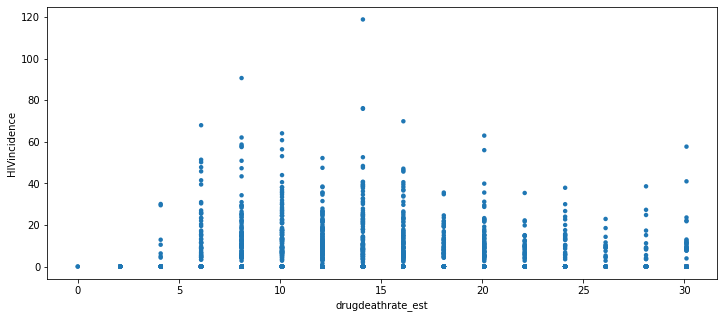

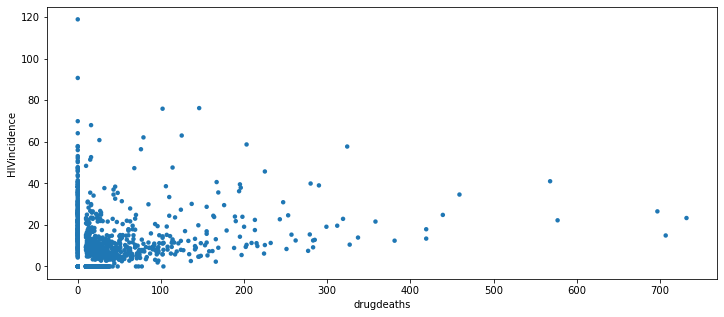

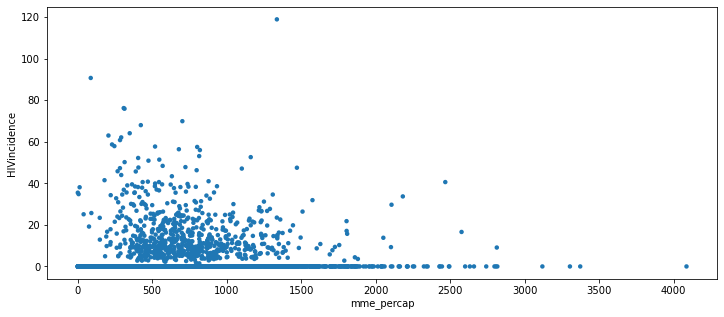

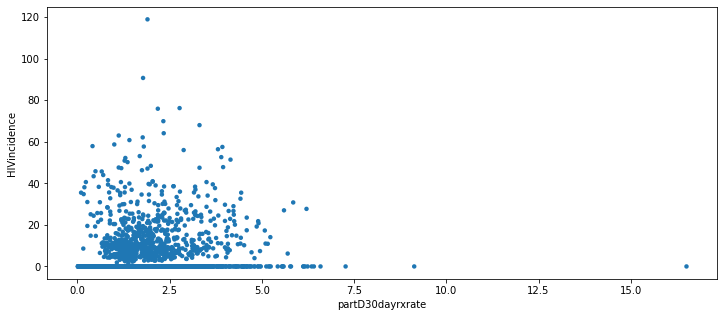

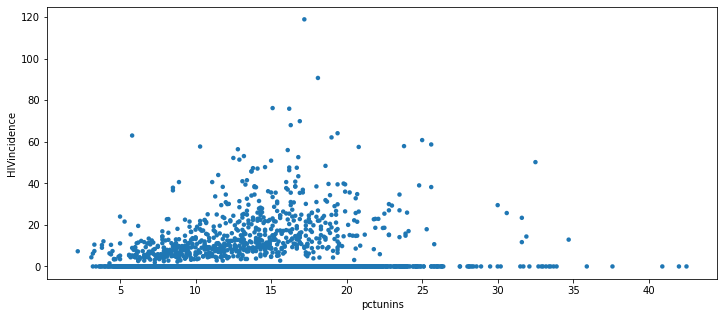

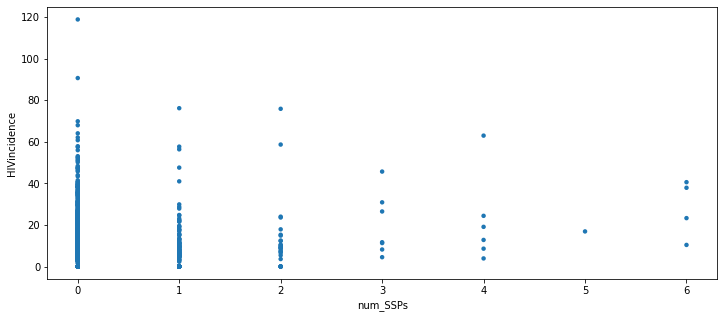

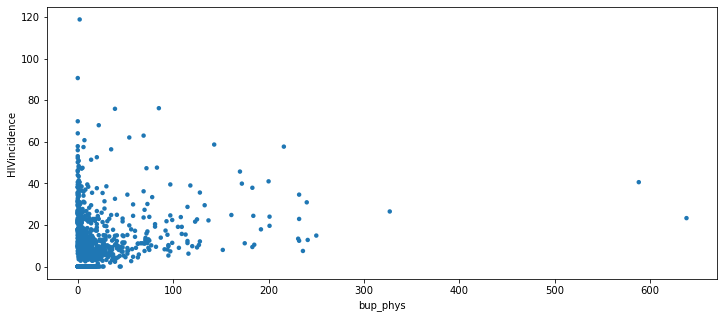

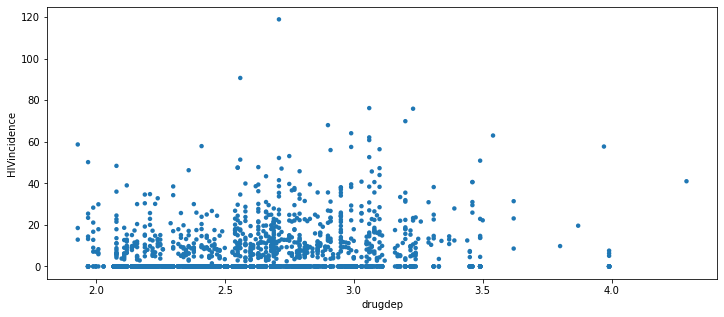

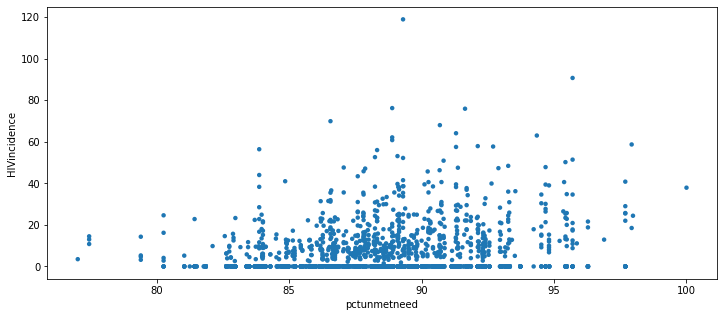

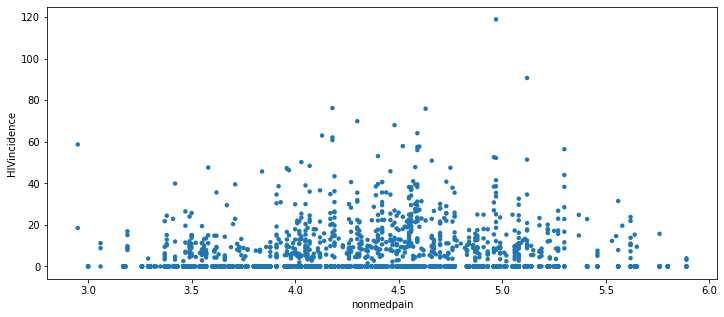

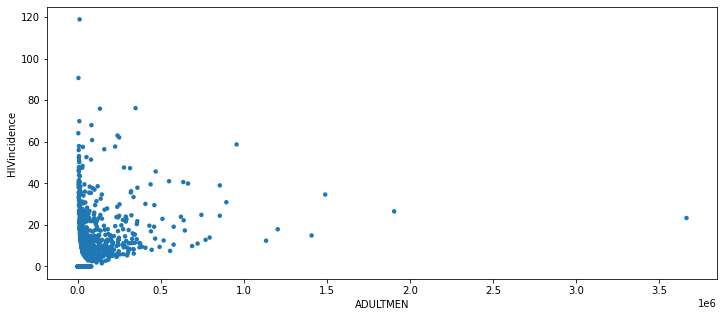

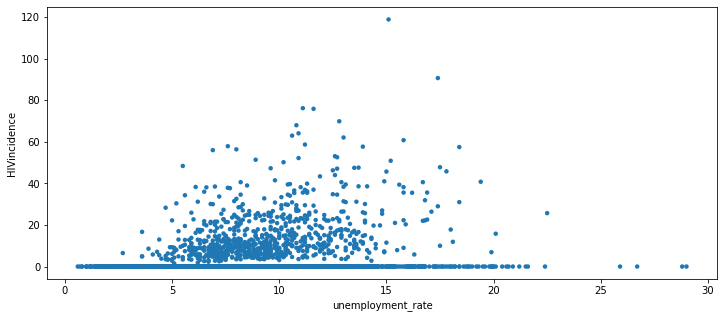

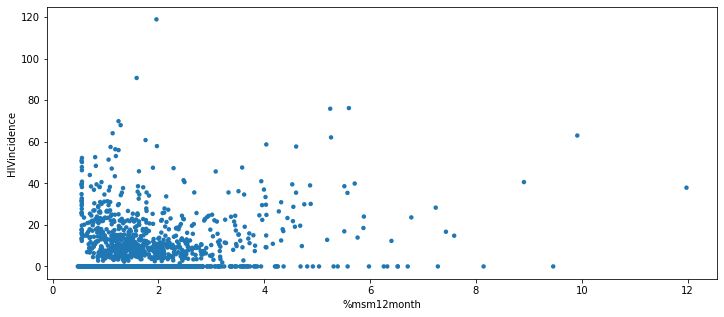

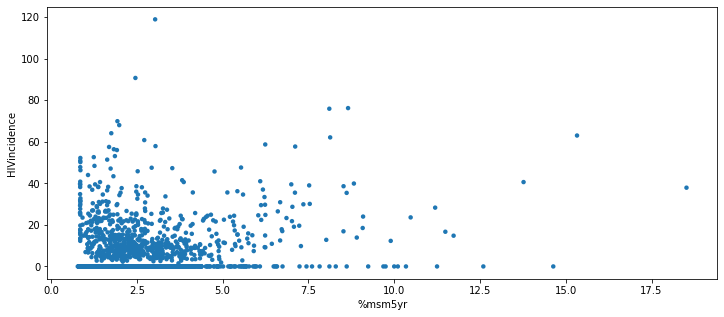

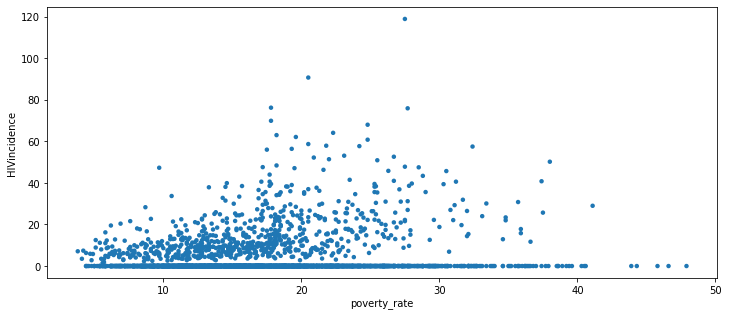

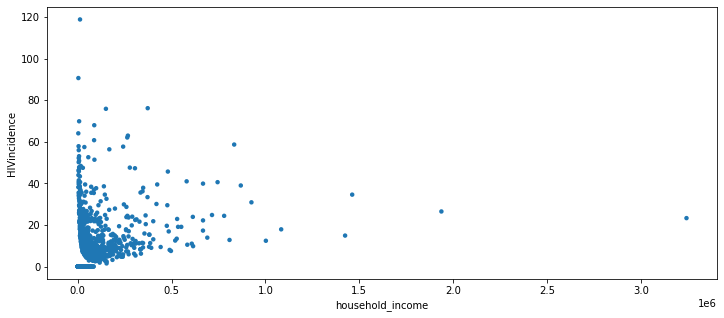

In [139]:
for col in all_columns:
    hiv.plot(kind='scatter', y='HIVincidence', x=col, edgecolor='none', figsize=(12, 5))
    plt.xlabel(col)
    plt.ylabel('HIVincidence')
    plt.show()

In [72]:
summary_model(X, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.21
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           3.19e-50
Time:                        10:46:35   Log-Likelihood:                -12345.
No. Observations:                2937   AIC:                         2.475e+04
Df Residuals:                    2906   BIC:                         2.494e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
county_code         -2.6e-08    2.1e-05     -0.001      0.999   -4.12e-05    4.12e-05
YEAR                 -0.0076      0.005     -1.565      0.118      -0.017       0.002
AMAT_fac              0.6658      2.009      0.331      0.740      -3.273       4.604
MH_fac               -0.1634      0.406     -0.403      0.687      -0.959       0.632
Med_AMAT_fac         -0.7143      2.259     -0.316      0.752      -5.143       3.714
Med_MH_fac            0.2308      0.443      0.521      0.603      -0.638       1.100
Med_SA_fac            0.2936      0.251      1.172      0.241      -0.198       0.785
Med_SMAT_fac         -2.1617      0.771     -2.802      0.005      -3.674      -0.649
Med_TMAT_fac          1.4397      1.125      1.280      0.201      -0.766       3.646
PLHIV                 0.0021      0.000      5.488      0.000       0.001       0.003
Population         7.346e-06   2.69e-05      0.274      0.784   -4.53e-05       6e-05
SA_fac               -0.2294      0.144     -1.595      0.111      -0.512       0.053
SMAT_fac              1.3218      0.649      2.037      0.042       0.050       2.594
TMAT_fac             -0.9828      0.889     -1.105      0.269      -2.726       0.761
drugdeathrate         0.0624      0.038      1.633      0.103      -0.013       0.137
drugdeathrate_est    -0.2146      0.056     -3.862      0.000      -0.323      -0.106
drugdeaths            0.0243      0.019      1.264      0.206      -0.013       0.062
mme_percap            0.0008      0.001      0.983      0.326      -0.001       0.002
partD30dayrxrate      0.9902      0.339      2.919      0.004       0.325       1.655
pctunins              0.1215      0.077      1.581      0.114      -0.029       0.272
num_SSPs              1.4497      0.908      1.597      0.110      -0.331       3.230
bup_phys             -0.0044      0.036     -0.123      0.902      -0.075       0.066
drugdep               2.1992      1.085      2.028      0.043       0.072       4.326
pctunmetneed          0.0504      0.103      0.487      0.626      -0.152       0.253
nonmedpain            0.1495      0.638      0.235      0.815      -1.101       1.400
ADULTMEN          -8.188e-05   7.94e-05     -1.031      0.303      -0.000    7.38e-05
unemployment_rate     0.4234      0.120      3.541      0.000       0.189       0.658
%msm12month          21.6334     33.771      0.641      0.522     -44.584      87.851
%msm5yr             -12.6056     21.846     -0.577      0.564     -55.441      30.230
poverty_rate          0.0545      0.072      0.762      0.446      -0.086       0.195
household_income   5.103e-05   4.67e-05      1.094      0.274   -4.05e-05       0.000
==============================================================================
Omnibus:                     8266.096   Durbin-Watson:                   1.966
P

In [141]:
X_test_new = X_test.copy()
X_train_new = X_train.copy()
standard = StandardScaler()
standard.fit(X_train)


StandardScaler()

In [143]:
summary_model(X_test_new, y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     14.25
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           5.55e-53
Time:                        13:08:34   Log-Likelihood:                -2455.6
No. Observations:                 734   AIC:                             4971.
Df Residuals:                     704   BIC:                             5109.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -19.7866      8.608     -2.299      0.022     -36.686      -2.887
AMAT_fac              5.0038      1.896      2.639      0.009       1.280       8.727
MH_fac                0.4890      0.427      1.144      0.253      -0.350       1.328
Med_AMAT_fac         -6.9713      2.261     -3.084      0.002     -11.410      -2.533
Med_MH_fac           -0.6314      0.472     -1.338      0.181      -1.558       0.295
Med_SA_fac            0.2011      0.274      0.735      0.463      -0.336       0.739
Med_SMAT_fac         -2.3712      0.786     -3.015      0.003      -3.915      -0.827
Med_TMAT_fac          2.2283      1.050      2.122      0.034       0.166       4.290
PLHIV                 0.0042      0.001      5.773      0.000       0.003       0.006
Population        -6.003e-05   2.65e-05     -2.267      0.024      -0.000   -8.04e-06
SA_fac               -0.0799      0.179     -0.447      0.655      -0.430       0.271
SMAT_fac              2.2992      0.694      3.315      0.001       0.937       3.661
TMAT_fac             -2.1295      0.897     -2.375      0.018      -3.890      -0.369
drugdeathrate         0.0846      0.029      2.921      0.004       0.028       0.141
drugdeathrate_est    -0.1796      0.049     -3.627      0.000      -0.277      -0.082
drugdeaths           -0.0811      0.019     -4.207      0.000      -0.119      -0.043
mme_percap           -0.0004      0.001     -0.581      0.561      -0.002       0.001
partD30dayrxrate      1.3303      0.292      4.562      0.000       0.758       1.903
pctunins              0.1445      0.068      2.115      0.035       0.010       0.279
num_SSPs             -2.5817      1.100     -2.347      0.019      -4.741      -0.422
bup_phys              0.1057      0.039      2.704      0.007       0.029       0.183
drugdep               1.8233      0.955      1.909      0.057      -0.052       3.698
pctunmetneed          0.1360      0.089      1.526      0.127      -0.039       0.311
nonmedpain           -0.1403      0.566     -0.248      0.804      -1.252       0.972
ADULTMEN           9.606e-05   9.34e-05      1.028      0.304   -8.73e-05       0.000
unemployment_rate     0.2374      0.106      2.235      0.026       0.029       0.446
%msm12month          -2.9099     25.378     -0.115      0.909     -52.735      46.915
%msm5yr               2.2164     16.416      0.135      0.893     -30.014      34.447
poverty_rate          0.1184      0.063      1.875      0.061      -0.006       0.242
household_income   8.573e-05   4.92e-05      1.744      0.082   -1.08e-05       0.000
==============================================================================
Omnibus:                      459.087   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4390.439
Skew:   

In [157]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [158]:
def rss(y, yhat):
    return np.mean((y  - yhat)**2)

In [161]:
from src.utils import XyScaler
def cv(X, y, base_estimator, n_folds):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train, test) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X.iloc[train].values, y.iloc[train].values
        X_cv_test, y_cv_test = X.iloc[test].values, y.iloc[test].values
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = clone(base_estimator)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors

In [162]:
cv(X_train, y_train, ridge, 10)

(array([0.67212761, 0.66370855, 0.66824299, 0.68971943, 0.65397912,
        0.65685626, 0.68038714, 0.68653807, 0.6459571 , 0.65856955]),
 array([0.44570414, 0.44407953, 0.58949022, 0.39804248, 0.68940109,
        0.8163476 , 0.72568705, 0.70866479, 1.12958623, 1.26078068]))

In [166]:
n_folds = 10
train_cv_errors, test_cv_errors = cv(X_train, y_train, 
                                     Ridge(alpha=0.5), n_folds=n_folds)

In [167]:
print("Training CV error: {:2.2f}".format(train_cv_errors.mean()))
print("Test CV error: {:2.2f}".format(test_cv_errors.mean()))

Training CV error: 0.67
Test CV error: 0.72


In [175]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [177]:
ridge_alphas = np.logspace(-2, 4, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(
    X_train, y_train, Ridge, ridge_alphas)

In [178]:
ridge_cv_errors_train.head()

,0.010000,0.010571,0.011174,0.011811,0.012485,0.013197,0.013950,0.014746,0.015587,0.016477,...,6069.215106,6415.476458,6781.492741,7168.391014,7577.362639,8009.666946,8466.635113,8949.674265,9460.271807,10000.000000
0,0.672082,0.672082,0.672082,0.672082,0.672082,0.672082,0.672082,0.672082,0.672082,0.672082,...,0.797403,0.800168,0.802945,0.805732,0.808529,0.811336,0.814152,0.816977,0.819811,0.822654
1,0.663610,0.663610,0.663610,0.663610,0.663610,0.663610,0.663610,0.663610,0.663610,0.663610,...,0.792503,0.795280,0.798070,0.800871,0.803685,0.806509,0.809344,0.812190,0.815046,0.817914
2,0.668101,0.668101,0.668101,0.668101,0.668101,0.668101,0.668101,0.668101,0.668101,0.668101,...,0.801196,0.804005,0.806822,0.809646,0.812476,0.815313,0.818155,0.821002,0.823855,0.826712
3,0.689643,0.689643,0.689643,0.689643,0.689643,0.689643,0.689643,0.689643,0.689643,0.689643,...,0.810760,0.813300,0.815850,0.818412,0.820983,0.823564,0.826155,0.828756,0.831366,0.833986
4,0.653930,0.653930,0.653930,0.653930,0.653930,0.653930,0.653930,0.653930,0.653930,0.653930,...,0.769208,0.772102,0.775015,0.777948,0.780901,0.783873,0.786864,0.789875,0.792905,0.795955


In [179]:
ridge_mean_cv_errors_train = ridge_cv_errors_train.mean(axis=0)
ridge_mean_cv_errors_test = ridge_cv_errors_test.mean(axis=0)

In [180]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(ridge_mean_cv_errors_test)

Text(0, 0.5, 'RSS')

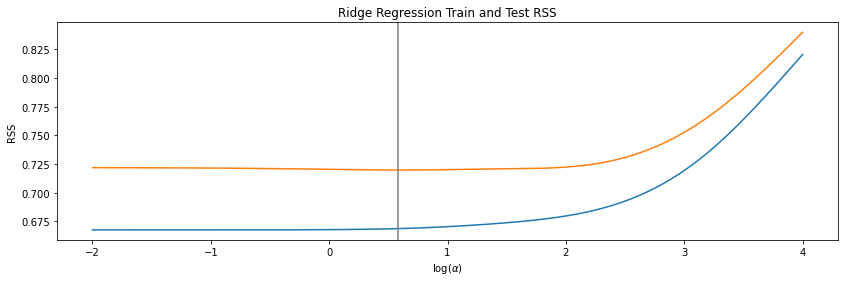

In [224]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_train)
ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_test)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.set_title("Ridge Regression Train and Test RSS")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("RSS")

In [182]:
ridge_models = []

for alpha in ridge_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.values, y_train.values)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_std, y_train_std)
    ridge_models.append(ridge)

In [183]:
paths = pd.DataFrame(np.empty(shape=(len(ridge_alphas), len(X_train.columns))),
                     index=ridge_alphas, columns=X_train.columns)

for idx, model in enumerate(ridge_models):
    paths.iloc[idx] = model.coef_

Text(0, 0.5, 'Standardized Coefficient')

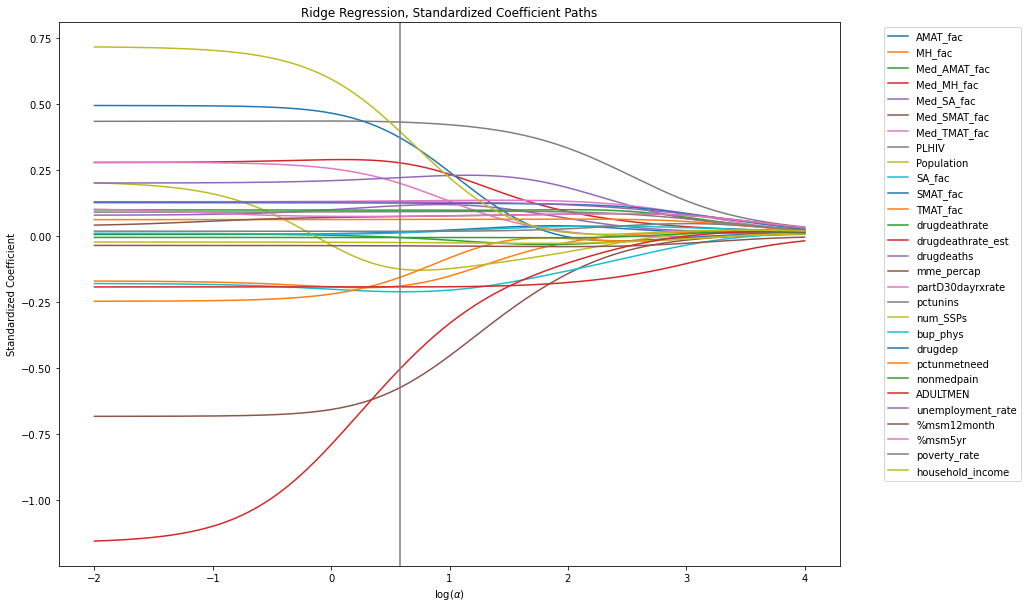

In [188]:
fig, ax = plt.subplots(figsize=(14, 10))

for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(ridge_alphas), path, label=column)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
ax.set_title("Ridge Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")

In [198]:
lasso_alphas = np.logspace(-8, -2, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(
    X_train, y_train, Lasso, lasso_alphas, max_iter=5000)

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.6859523661644, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 655.9676567150469, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661.1589999949603, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: C

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639.6368726465987, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652.281634437742, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.5022302255635, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679.5060283923095, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639.557550436182, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652.2301825352832, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648.1502517628888, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 670.7874179939549, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679.3796797239804, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.9188698274717, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642.2779489272824, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647.6595825762284, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.4013896989195, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660.0700356291595, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.4622785494721, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Co

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.947983187014, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663.0942078841888, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.8773928679207, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: C

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678.6866006002612, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638.9499122730883, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.8361092477295, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644.9777483226553, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666.8126613065244, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678.4117961889216, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677.9553106699825, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635.4726267673369, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643.9189329727708, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.0139451309674, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 657.7109793162304, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676.9601983121158, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Co

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.2225286134814, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660.0274070953368, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.8836805769951, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: 

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676.9041781438381, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 637.6281107773108, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 650.9792911790886, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638.1554016868155, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658.2843256383206, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676.3063208846875, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.4897088238722, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620.5530440034413, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635.890847630705, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643.7337481219084, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652.6227973814858, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.315124054249, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Con

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.6453178034365, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.3345651511247, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641.3185422696641, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: 

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673.0254833366766, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634.7514543778639, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.1165380185573, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623.6718189277551, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640.2661934462633, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.7240236964909, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 657.3290735718384, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587.5375918930982, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618.92034091148, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descen

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 628.2980697775445, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641.7514371642604, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652.5497532072027, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Co

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646.2169673252528, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638.6667931184687, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623.2401170144675, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: 

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.5778865324813, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 628.4847186083067, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645.0677772853549, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.7553860631049, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603.4262577985558, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661.741187784169, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626.0594173344322, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513.0900094410762, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 584.1817508176479, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596.5018284926772, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618.989141861372, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615.4286770537947, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Con

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638.7681008412297, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.2328088599487, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586.3516679000306, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: 

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646.146623109472, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614.8039305661188, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636.2722656820238, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.3897766111976, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533.0327340705247, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639.9478770374128, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555.8464268896183, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340.3661167034227, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517.6442631074266, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534.8146466936032, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.3174810249465, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531.6463863344841, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Co

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622.600508242402, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533.2023460104613, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.1537753382771, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: C

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605.793857947931, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 584.8080949995858, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 617.1889479388225, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433.7366939865218, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.2241933092252, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592.1861676042417, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.822422515804, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.90212829220275, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.7667127176287, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428.534570147655, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.2799912200029, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.7834358047953, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Con

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587.6025196876445, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364.0100849240167, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.56571471074193, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530:

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517.0022159585104, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518.514315250094, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575.9215416390082, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289.84871821573154, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.49737816988596, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.0121648898542, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_d

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243.15106464451208, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.902087697261322, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.6264800923045, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.90689056900544, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.1192351770278, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.34953264340902, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: 

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.4402937308931, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.26313433108544, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247.36372365614517, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323.00315261817417, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.8982623078749, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.59423717121615, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_de

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.48748197108955, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.22513310086981, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.75045189303114, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.17720168172445, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.082925701623253, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.5196422340523, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.9495916381835, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.2255165502704, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.58922906456166, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Co

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.75985830315085, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.108863737267825, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.65906099784661, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:53

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.998296433427754, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.43104035633439, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306.19985506658134, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_de

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.66330820087478, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.50521845765502, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.43971376396439, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.731623643241164, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4408992777100593, tolerance: 0.19819999999999985
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.42071276956392, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_de

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.882078502325385, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.7249332055693, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.842983762385757, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: C

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.85620578276689, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.14920811054276, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.463067929825, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Co

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.01226534467719, tolerance: 0.19819999999999974
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.952134580560141, tolerance: 0.19810000000000022
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.497621603305333, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.261824126923784, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3558978215646675, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6421516295681613, tolerance: 0.1982000000000004
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_de

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.490339492045678, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0130394191064624, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1745633473990438, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_d

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.833576117945995, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4861886310668524, tolerance: 0.19820000000000043
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5470713418178548, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24376079902890524, tolerance: 0.19820000000000032
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.649578344765132, tolerance: 0.1981
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2581779354025002, tolerance: 0.1982000000000003
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530

In [203]:
lasso_cv_errors_test.shape

(10, 250)

Text(0, 0.5, 'RSS')

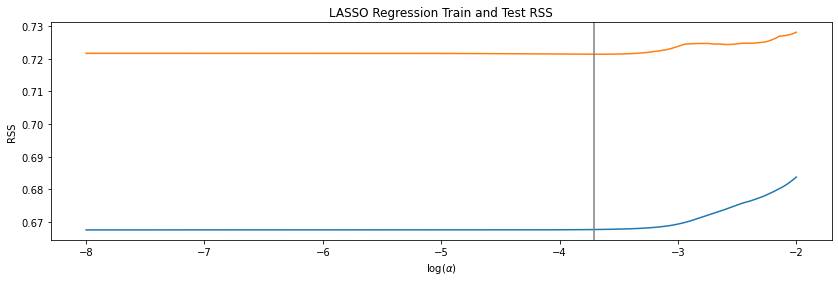

In [225]:
lasso_mean_cv_errors_train = lasso_cv_errors_train.mean(axis=0)
lasso_mean_cv_errors_test = lasso_cv_errors_test.mean(axis=0)

lasso_optimal_alpha = get_optimal_alpha(lasso_mean_cv_errors_test)
    
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_train)
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_test)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.set_title("LASSO Regression Train and Test RSS")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("RSS")

In [204]:
lasso_models = []

for alpha in lasso_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.values, y_train.values)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_std, y_train_std)
    lasso_models.append(lasso)

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737.1141217938268, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737.1111261243128, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737.10795954152, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.8892141373294, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.8733860781264, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.8566548808208, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descen

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.7006445090979, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.6169798691275, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.5285387987493, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descen

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729.411461985617, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728.9682583580862, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728.4996806849224, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695.9153560550161, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 693.5414014433086, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 691.0296534375133, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descen

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545.1286230450395, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.8019583149224, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528.2376828431168, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descen

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.38502158718802, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227.64867037822194, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218.0977418634078, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desc

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.432749804891273, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34137756994505253, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(
/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26274402955709775, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Standardized Coefficient')

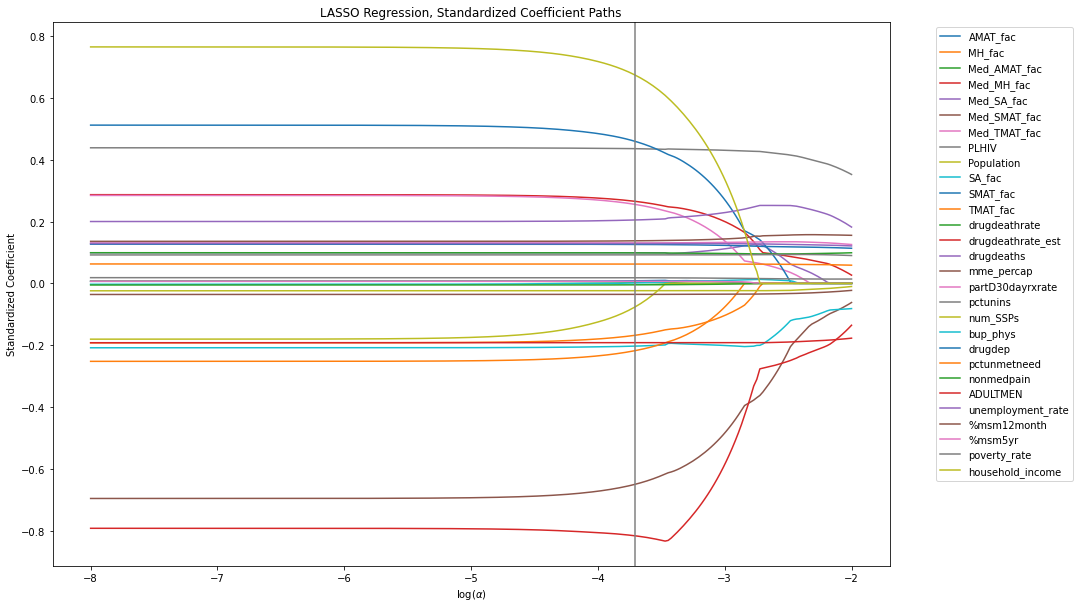

In [205]:
paths = pd.DataFrame(np.empty(shape=(len(lasso_alphas), len(X_train.columns))),
                     index=lasso_alphas, columns=X_train.columns)

for idx, model in enumerate(lasso_models):
    paths.iloc[idx] = model.coef_
    
fig, ax = plt.subplots(figsize=(15, 10))
for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(lasso_alphas), path, label=column)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("LASSO Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")

In [206]:
final_ridge = Ridge(alpha=ridge_optimal_alpha).fit(X_train_std, y_train_std)
final_lasso = Lasso(alpha=lasso_optimal_alpha).fit(X_train_std, y_train_std)
ridge_pred = final_ridge.predict(X_test)
lasso_pred = final_lasso.predict(X_test)

/home/sacg/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257.41906640301, tolerance: 0.2202000000000002
  model = cd_fast.enet_coordinate_descent(


In [208]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mse

2174333320.1289253

In [210]:
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

46629.74715917861

In [211]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mse

1311192358.491786

In [212]:
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

36210.39020076677

In [217]:
standardizer = XyScaler()
standardizer.fit(X_train.values, y_train.values)
X_train_std, y_train_std = standardizer.transform(X_train.values, y_train.values)
X_test_std, y_test_std = standardizer.transform(X_test.values, y_test.values)

In [221]:
final_ridge_rss = rss(y_test_std, final_ridge.predict(X_test_std))
final_lasso_rss = rss(y_test_std, final_lasso.predict(X_test_std))

In [222]:
final_ridge_rss

0.5575263072695406

In [223]:
final_lasso_rss

0.5566239831806251

In [226]:
ridge_optimal_alpha

3.787156506866572

In [227]:
lasso_optimal_alpha

0.0001946061794205562

In [243]:
paths.loc[lasso_optimal_alpha].sort_values(axis=0)

ADULTMEN            -0.816897
Med_SMAT_fac        -0.650857
TMAT_fac            -0.218161
SA_fac              -0.203238
drugdeathrate_est   -0.192091
MH_fac              -0.168361
Population          -0.077224
mme_percap          -0.035795
num_SSPs            -0.023749
nonmedpain          -0.004823
bup_phys             0.001164
Med_AMAT_fac         0.003857
%msm5yr              0.006804
AMAT_fac             0.008230
poverty_rate         0.018131
pctunmetneed         0.062542
pctunins             0.091730
drugdeathrate        0.098747
Med_SA_fac           0.098890
drugdep              0.125978
unemployment_rate    0.129007
partD30dayrxrate     0.130871
%msm12month          0.137580
drugdeaths           0.205048
Med_TMAT_fac         0.255867
Med_MH_fac           0.265686
PLHIV                0.435961
SMAT_fac             0.460126
household_income     0.675043
Name: 0.0001946061794205562, dtype: float64

In [244]:
# removed nonmedpain, bup_phys, Med_AMAT_fac, %msm5yr, AMAT_fac

Xf = hiv[['MH_fac',
       'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'drugdep',
       'pctunmetneed', 'ADULTMEN', 'unemployment_rate','%msm12month', 'poverty_rate',
       'household_income']]

yf = hiv[['HIVincidence']]

In [247]:
from src.helper import fit_predict_plot
def fit_predict_plot(df, features, response):
    X = df[features]
    y = df[response]

    X_train, X_test, y_train, y_test = train_test_split(X,y)

    model = LinearRegression()
    model.fit(X_train, y_train)

    yhat = model.predict(X_test)

    plt.scatter(yhat, y_test - yhat);
    return f'RMSE = {np.sqrt(mean_squared_error(y_test, yhat))}'

'RMSE = 7.516079211429758'

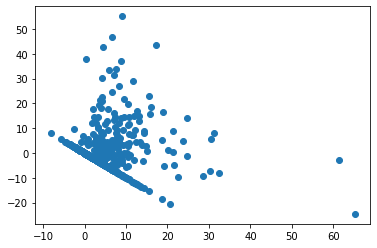

In [248]:
fit_predict_plot(hiv, ['MH_fac',
       'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'drugdep',
       'pctunmetneed', 'ADULTMEN', 'unemployment_rate','%msm12month', 'poverty_rate',
       'household_income'], 'HIVincidence')